In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [6]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fN3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv("magic04.data", names=cols) 
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fN3Trans   
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027  \
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [7]:
df["class"] = (df["class"] == "g").astype(int)

In [8]:
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fN3Trans   
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027  \
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

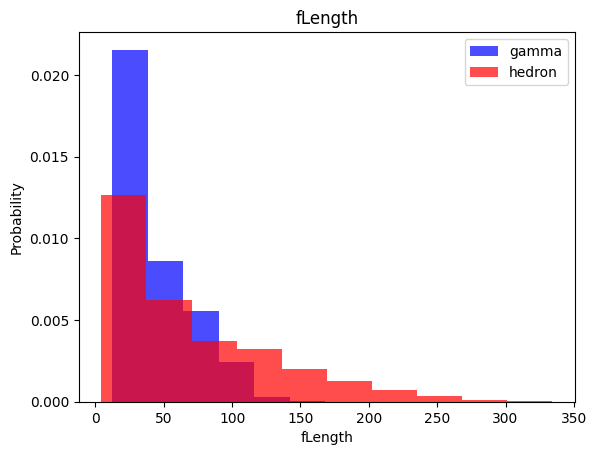

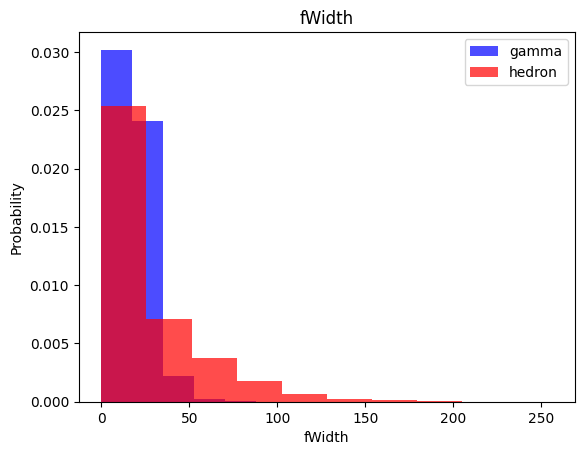

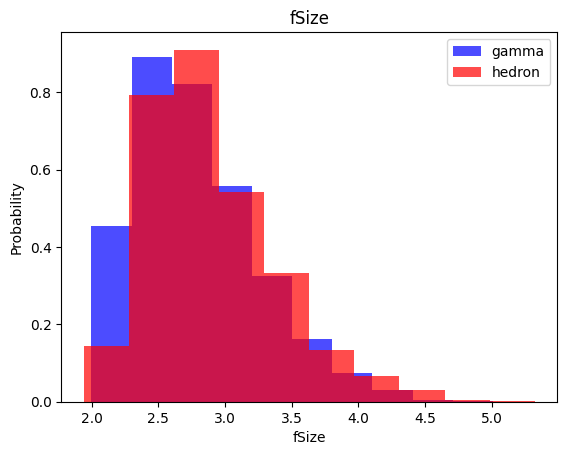

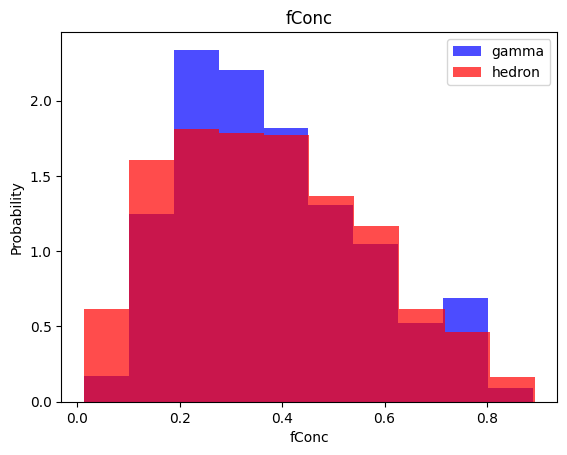

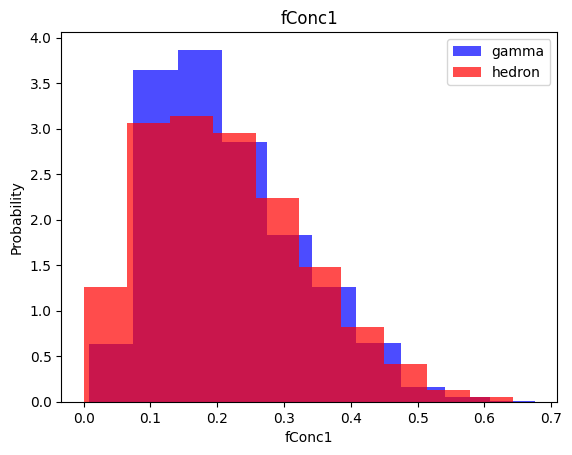

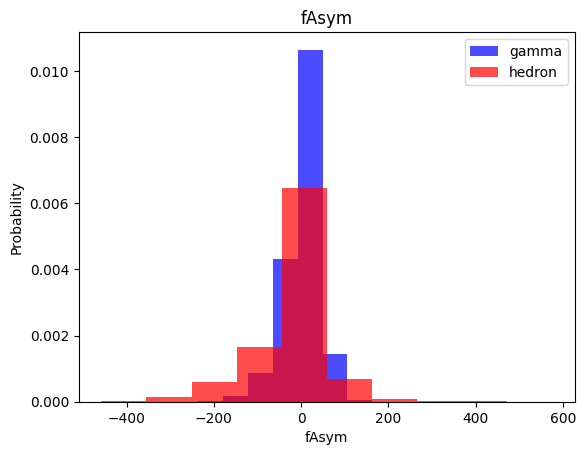

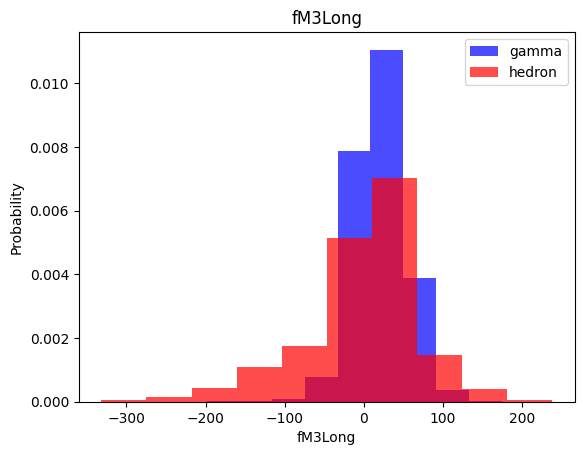

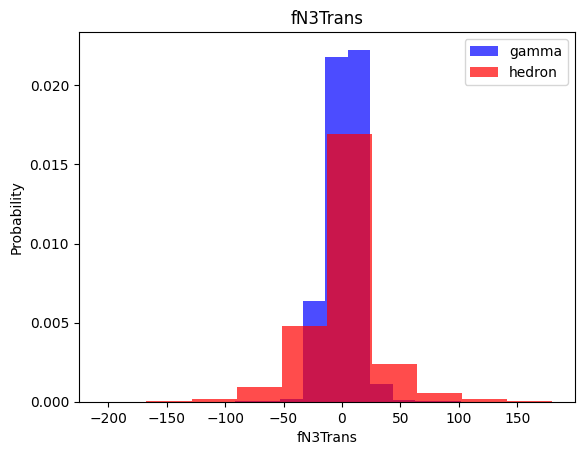

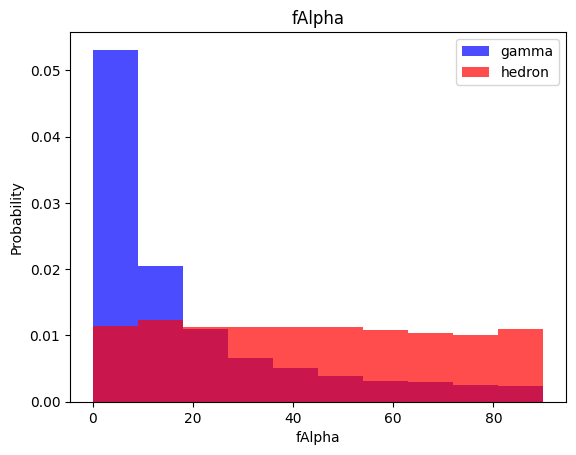

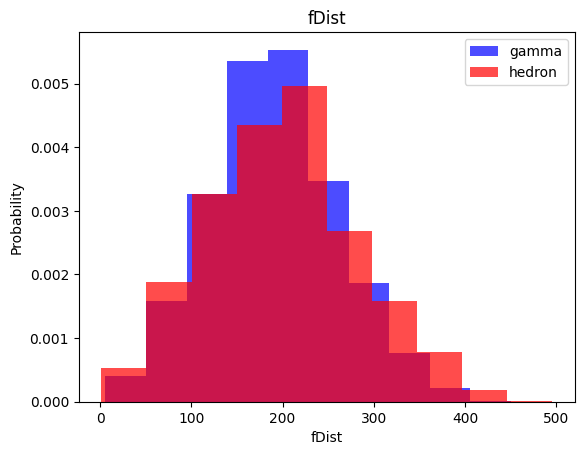

In [9]:
for label in cols[:-1]:
  plt.hist(df[df["class"]==1][label], color="blue", label="gamma", alpha=0.7, density=True)
  plt.hist(df[df["class"]==0][label], color="red", label="hedron", alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [10]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [11]:
def scale_dataset(dataframe, oversample=False): 
  x = dataframe[dataframe.columns[:-1]].values 
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler() 
  x = scaler.fit_transform(x)

  if oversample:
    ros = RandomOverSampler()
    x,y = ros.fit_resample(x,y)

  data = np.hstack((x,np.reshape(y, (-1,1))))

  return data, x, y

In [12]:
train

fLength   fWidth   fSize   fConc  fConc1     fAsym   fM3Long   
11595   36.6025  19.4770  3.1703  0.2358  0.1247  -14.3219  -30.0775  \
18542   16.0384  14.3239  2.6874  0.4929  0.3300    5.8464   12.4553   
16036   77.7764  11.3507  3.1919  0.2289  0.1212  -34.6685  -23.5648   
14467   26.5815   7.2683  2.4548  0.6982  0.3912   18.4302  -11.4328   
3918    47.0908  17.7940  3.2496  0.3248  0.2153    5.0712   42.9502   
...         ...      ...     ...     ...     ...       ...       ...   
7962    84.4221  36.4121  3.6229  0.2002  0.1085   11.9780   43.8629   
6364    38.5934  23.4096  2.7767  0.2391  0.1380   51.0509  -24.1166   
3802   107.9690  30.7899  2.8096  0.3023  0.1868  -21.7030 -138.3050   
2902    22.7867  10.9825  2.5315  0.5441  0.2750   13.6017   19.0918   
13820  116.3663  64.7152  3.7910  0.0637  0.0583 -126.6309   77.6836   

       fN3Trans   fAlpha     fDist  class  
11595   13.7172   0.9120  173.0440      1  
18542    6.5073  40.1421   99.9747      0  
16036   -7.5120  45.8326   79.4901      0  
14467   -5.8671  89.7897  243.7410      0  
3918    12.4977  10.8310  213.9520      1  
...         ...      ...       ...    ...  
7962     4.2585   4.2808  351.7060      1  
6364   -16.1042  26.9788   73.3844      1  
3802   -18.5660  69.0790  194.4440      1  
2902     9.1667   2.5590  131.6120      1  
13820   82.5549  22.4620  217.2226      0  

[11412 rows x 11 columns]

In [13]:
train, x_train, y_train = scale_dataset(train, oversample=True)
valid, x_valid, y_valid = scale_dataset(valid, oversample=False)
test, x_test, y_test = scale_dataset(test, oversample=False)

### K Nearest Neighbors (KNN)

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [15]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y_train)

KNeighborsClassifier()

In [16]:
y_pred = knn_model.predict(x_test)

In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.72      0.74      1361
           1       0.85      0.86      0.86      2443

    accuracy                           0.81      3804
   macro avg       0.80      0.79      0.80      3804
weighted avg       0.81      0.81      0.81      3804



In [18]:
y_test

array([0, 1, 1, ..., 1, 1, 0])

### Naive Bayes

In [19]:
from sklearn.naive_bayes import GaussianNB

In [20]:
nb_model = GaussianNB()
nb_model = nb_model.fit(x_train, y_train)

In [21]:
y_pred = nb_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.39      0.49      1361
           1       0.72      0.89      0.80      2443

    accuracy                           0.71      3804
   macro avg       0.70      0.64      0.65      3804
weighted avg       0.70      0.71      0.69      3804



# Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(x_train, y_train)

In [24]:
y_pred = lg_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.71      0.70      1361
           1       0.83      0.82      0.83      2443

    accuracy                           0.78      3804
   macro avg       0.76      0.76      0.76      3804
weighted avg       0.78      0.78      0.78      3804



# SVM

In [25]:
from sklearn.svm import SVC

In [26]:
svm_model = SVC()
svm_model = svm_model.fit(x_train, y_train)

In [27]:
y_pred = svm_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.77      0.80      1361
           1       0.88      0.91      0.90      2443

    accuracy                           0.86      3804
   macro avg       0.86      0.84      0.85      3804
weighted avg       0.86      0.86      0.86      3804



# Neural Network

In [28]:
import tensorflow as tf

In [29]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4))
  ax1.plot(history.history['loss'], label='lose')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.legend()
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.legend()
  ax2.grid(True)

  plt.show()

In [30]:
def train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy', metrics=['accuracy'])
  history = nn_model.fit(
      x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose = 0
  )

  return nn_model, history

16 nodes, dropout 0, lr 0.1, batch size 32


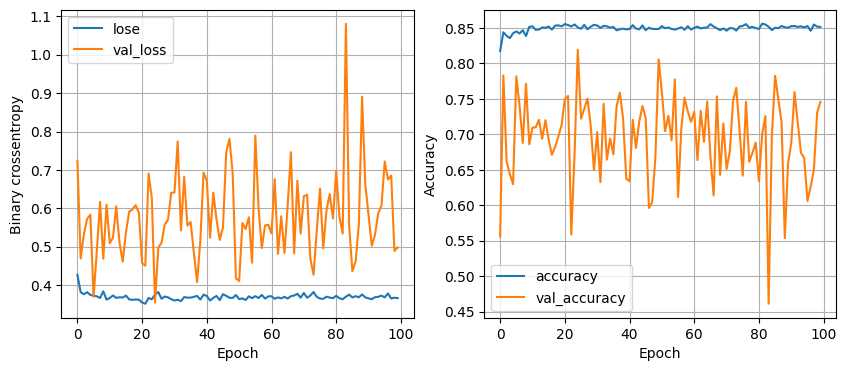

119/119 [==============================] - 0s 533us/step - loss: 0.3995 - accuracy: 0.8544


16 nodes, dropout 0, lr 0.1, batch size 64


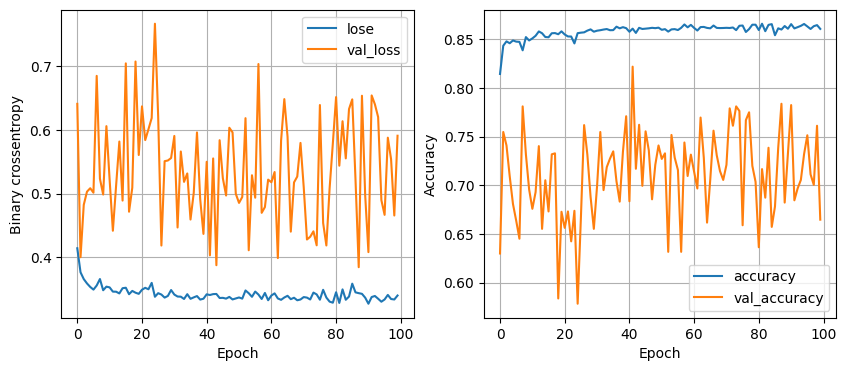

119/119 [==============================] - 0s 1ms/step - loss: 0.3405 - accuracy: 0.8675


16 nodes, dropout 0, lr 0.1, batch size 128


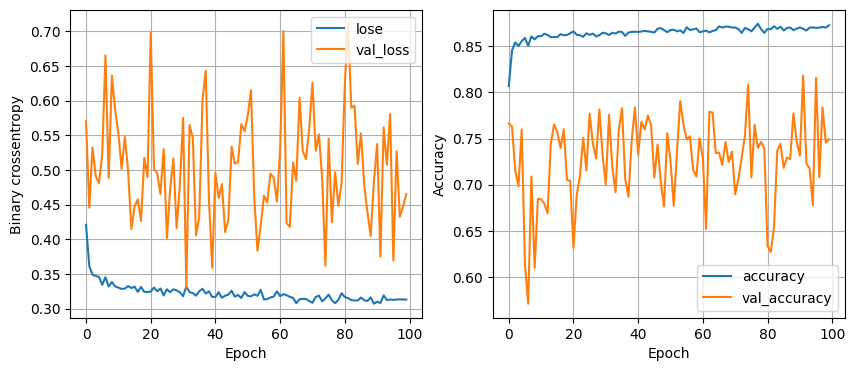

119/119 [==============================] - 0s 416us/step - loss: 0.3382 - accuracy: 0.8720


16 nodes, dropout 0, lr 0.005, batch size 32


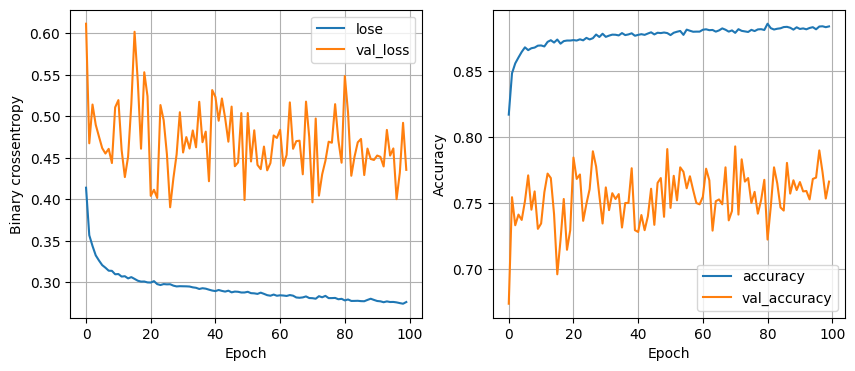

119/119 [==============================] - 0s 405us/step - loss: 0.3344 - accuracy: 0.8712


16 nodes, dropout 0, lr 0.005, batch size 64


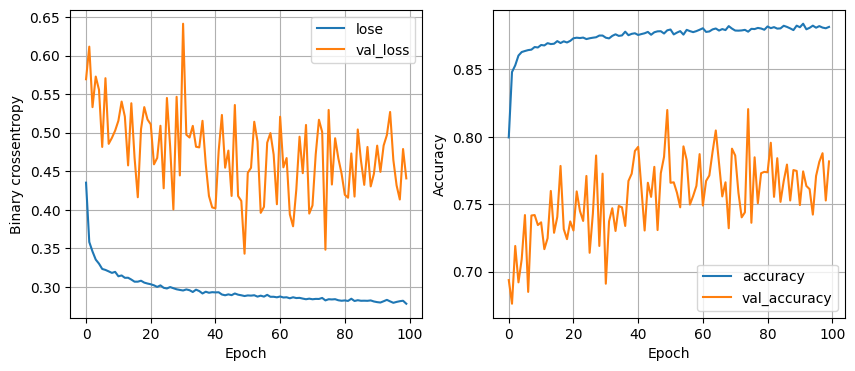

119/119 [==============================] - 0s 406us/step - loss: 0.3157 - accuracy: 0.8688


16 nodes, dropout 0, lr 0.005, batch size 128


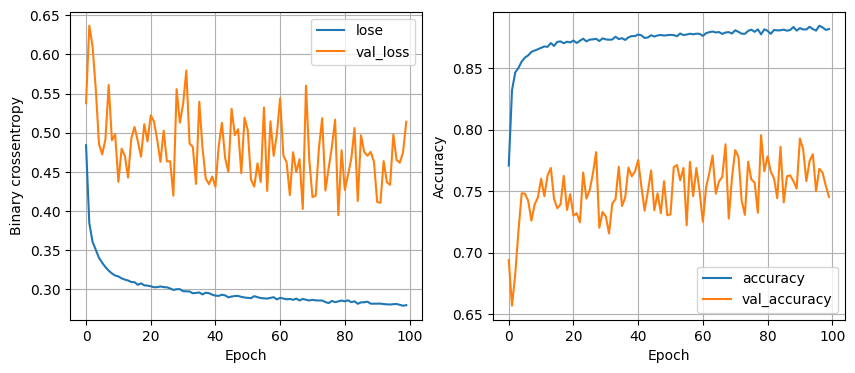

119/119 [==============================] - 0s 426us/step - loss: 0.3192 - accuracy: 0.8696


16 nodes, dropout 0, lr 0.001, batch size 32


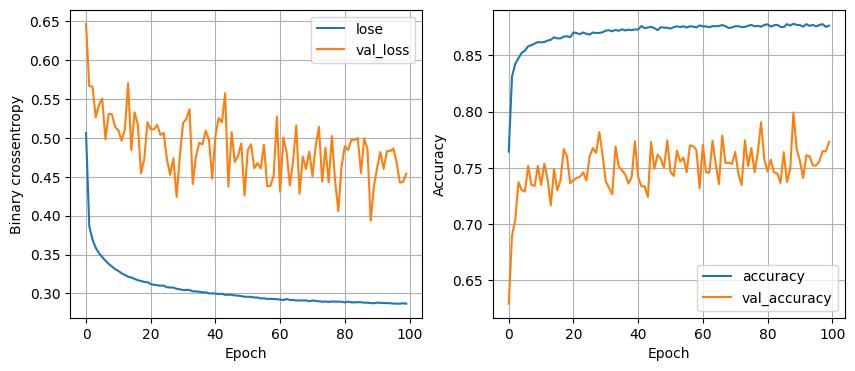

119/119 [==============================] - 0s 415us/step - loss: 0.3106 - accuracy: 0.8728


16 nodes, dropout 0, lr 0.001, batch size 64


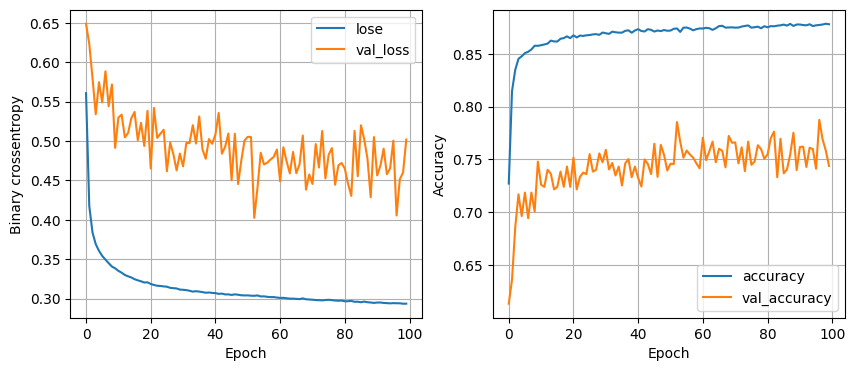

119/119 [==============================] - 0s 474us/step - loss: 0.3132 - accuracy: 0.8738


16 nodes, dropout 0, lr 0.001, batch size 128


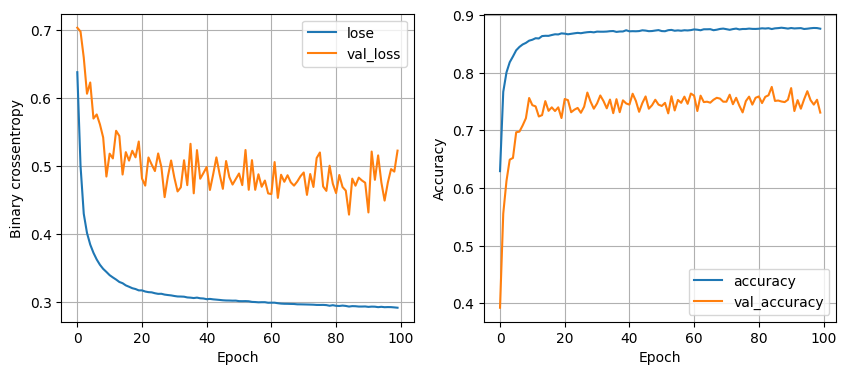

119/119 [==============================] - 0s 812us/step - loss: 0.3044 - accuracy: 0.8746


16 nodes, dropout 0.2, lr 0.1, batch size 32


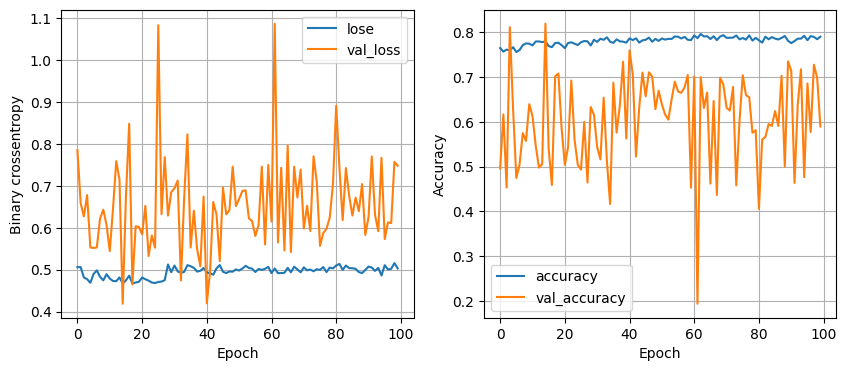

119/119 [==============================] - 0s 425us/step - loss: 0.4596 - accuracy: 0.8381


16 nodes, dropout 0.2, lr 0.1, batch size 64


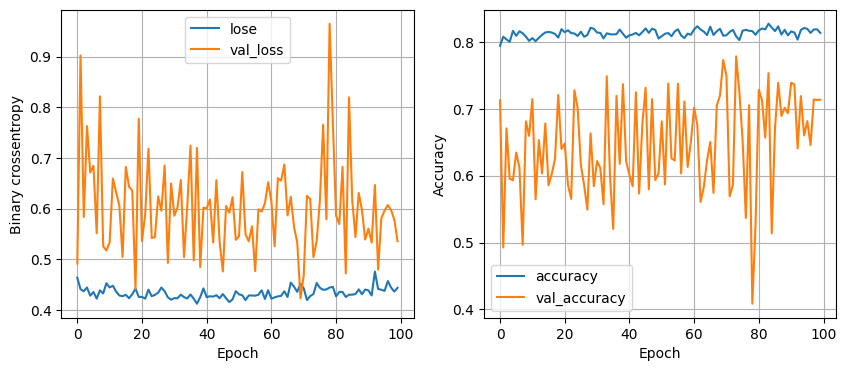

119/119 [==============================] - 0s 418us/step - loss: 0.4057 - accuracy: 0.8596


16 nodes, dropout 0.2, lr 0.1, batch size 128


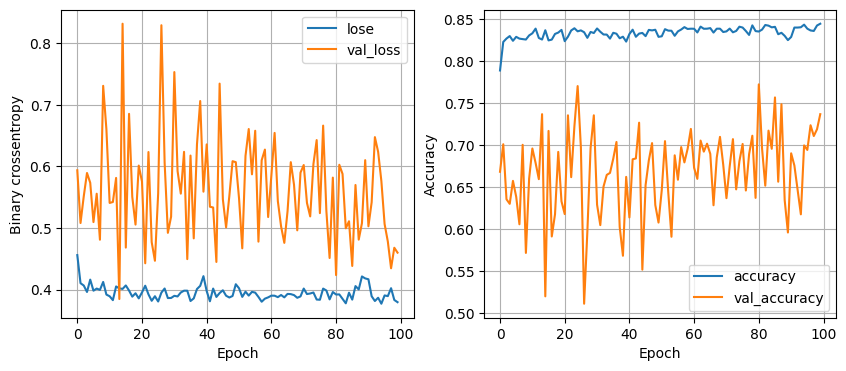

119/119 [==============================] - 0s 425us/step - loss: 0.3713 - accuracy: 0.8594


16 nodes, dropout 0.2, lr 0.005, batch size 32


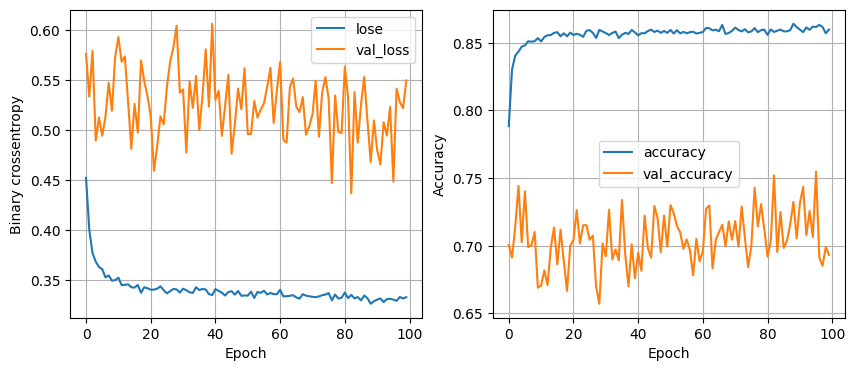

119/119 [==============================] - 0s 421us/step - loss: 0.3163 - accuracy: 0.8659


16 nodes, dropout 0.2, lr 0.005, batch size 64


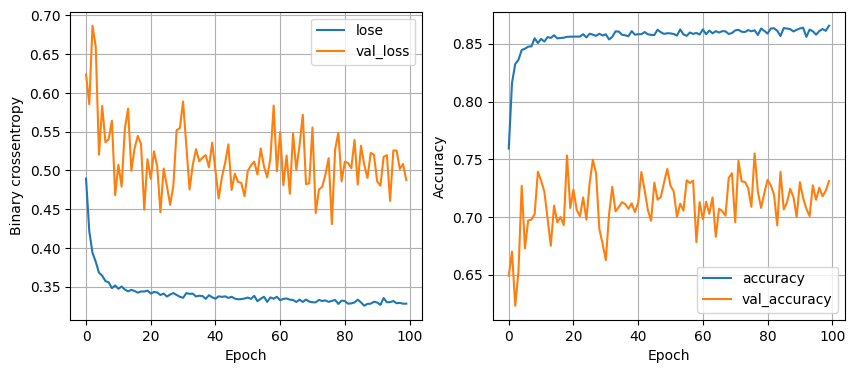

119/119 [==============================] - 0s 438us/step - loss: 0.3154 - accuracy: 0.8693


16 nodes, dropout 0.2, lr 0.005, batch size 128


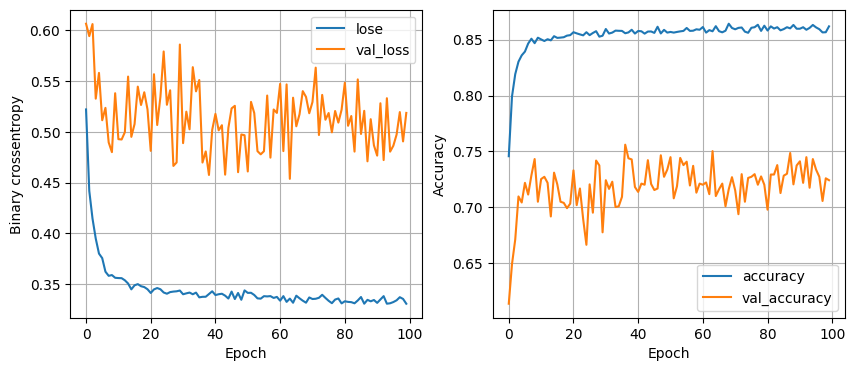

119/119 [==============================] - 0s 445us/step - loss: 0.3088 - accuracy: 0.8709


16 nodes, dropout 0.2, lr 0.001, batch size 32


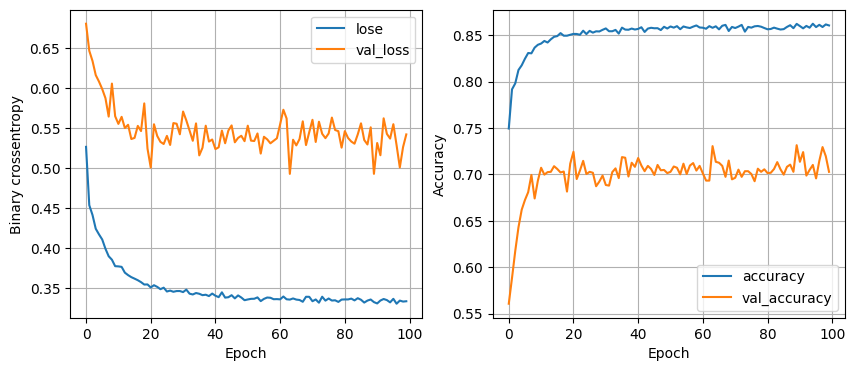

119/119 [==============================] - 0s 442us/step - loss: 0.3174 - accuracy: 0.8699


16 nodes, dropout 0.2, lr 0.001, batch size 64


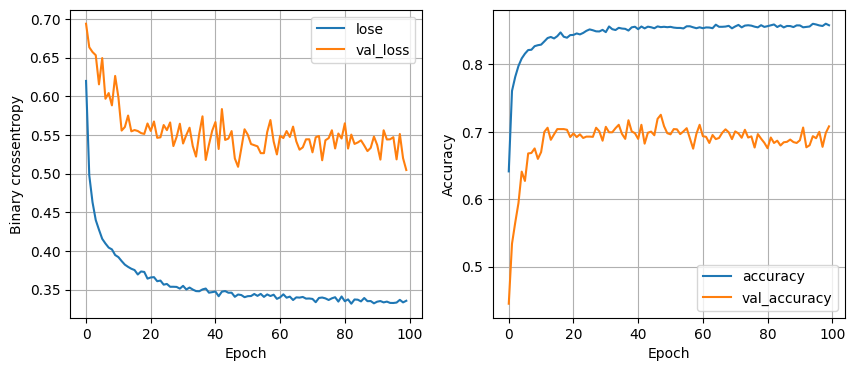

119/119 [==============================] - 0s 405us/step - loss: 0.3117 - accuracy: 0.8696


16 nodes, dropout 0.2, lr 0.001, batch size 128


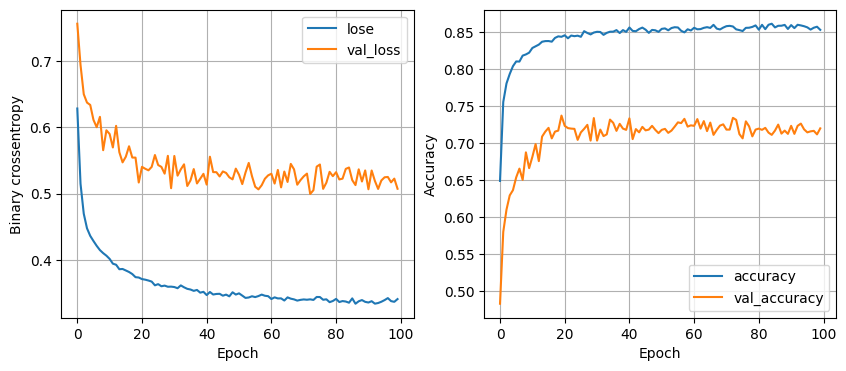

119/119 [==============================] - 0s 425us/step - loss: 0.3183 - accuracy: 0.8720


32 nodes, dropout 0, lr 0.1, batch size 32


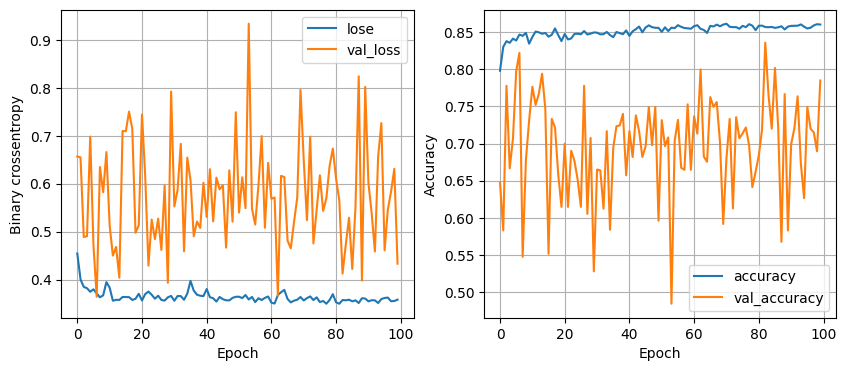

119/119 [==============================] - 0s 487us/step - loss: 0.3851 - accuracy: 0.8633


32 nodes, dropout 0, lr 0.1, batch size 64


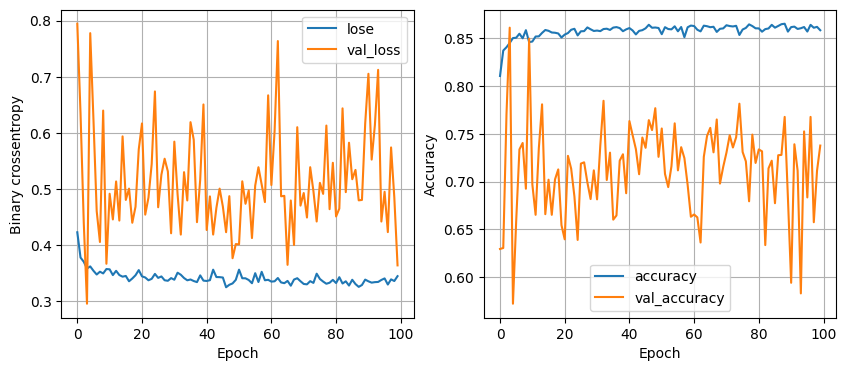

119/119 [==============================] - 0s 504us/step - loss: 0.3963 - accuracy: 0.8599


32 nodes, dropout 0, lr 0.1, batch size 128


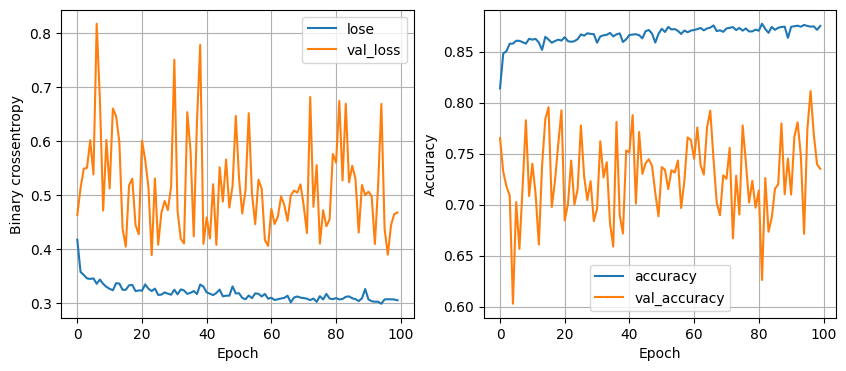

119/119 [==============================] - 0s 494us/step - loss: 0.3267 - accuracy: 0.8680


32 nodes, dropout 0, lr 0.005, batch size 32


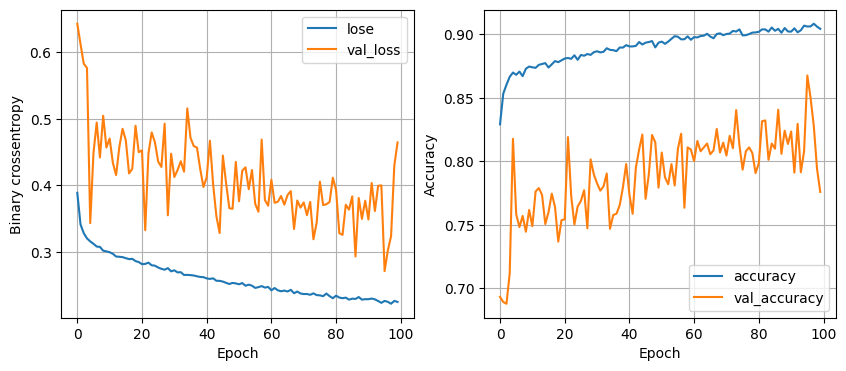

119/119 [==============================] - 0s 534us/step - loss: 0.3770 - accuracy: 0.8672


32 nodes, dropout 0, lr 0.005, batch size 64


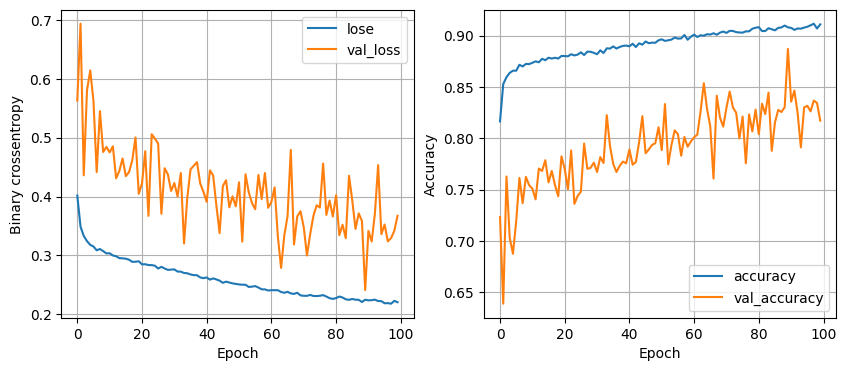

119/119 [==============================] - 0s 874us/step - loss: 0.3689 - accuracy: 0.8573


32 nodes, dropout 0, lr 0.005, batch size 128


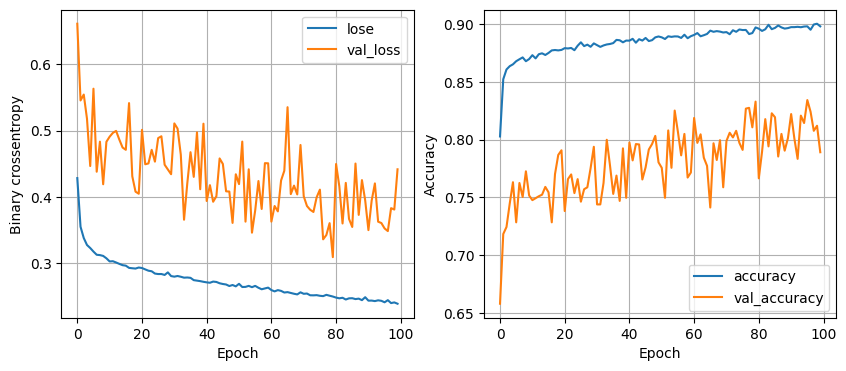

119/119 [==============================] - 0s 415us/step - loss: 0.3402 - accuracy: 0.8722


32 nodes, dropout 0, lr 0.001, batch size 32


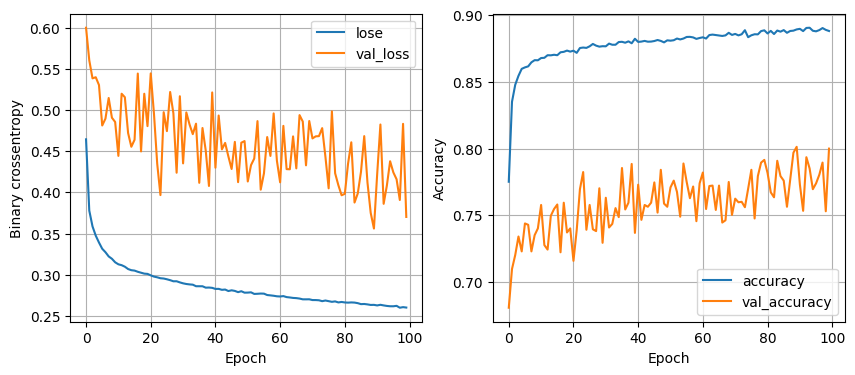

119/119 [==============================] - 0s 476us/step - loss: 0.3273 - accuracy: 0.8699


32 nodes, dropout 0, lr 0.001, batch size 64


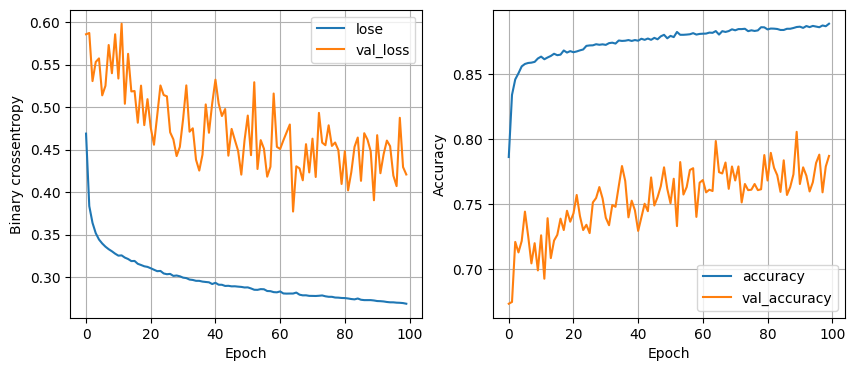

119/119 [==============================] - 0s 434us/step - loss: 0.3119 - accuracy: 0.8743


32 nodes, dropout 0, lr 0.001, batch size 128


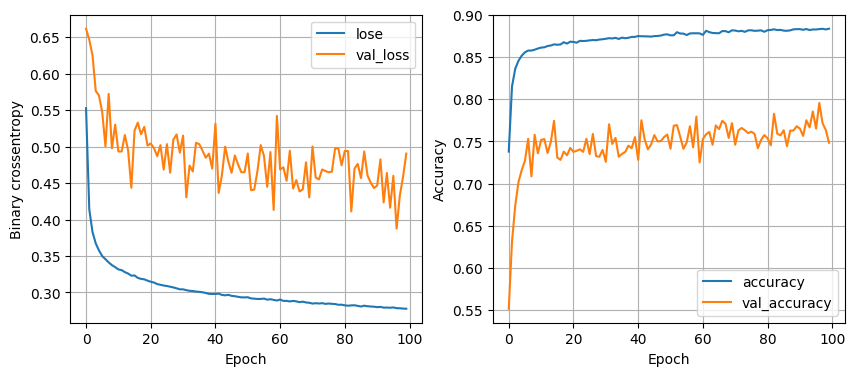

119/119 [==============================] - 0s 618us/step - loss: 0.3154 - accuracy: 0.8728


32 nodes, dropout 0.2, lr 0.1, batch size 32


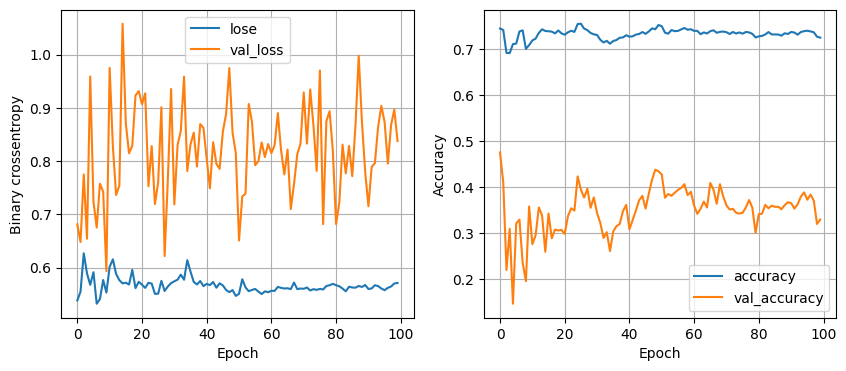

119/119 [==============================] - 0s 425us/step - loss: 0.5332 - accuracy: 0.7616


32 nodes, dropout 0.2, lr 0.1, batch size 64


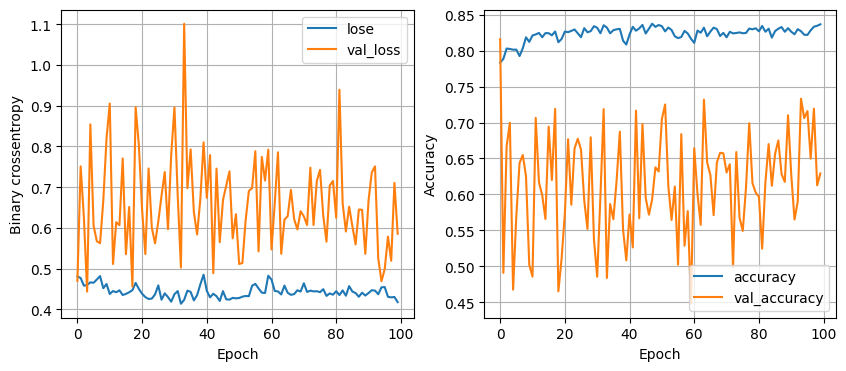

119/119 [==============================] - 0s 490us/step - loss: 0.4063 - accuracy: 0.8549


32 nodes, dropout 0.2, lr 0.1, batch size 128


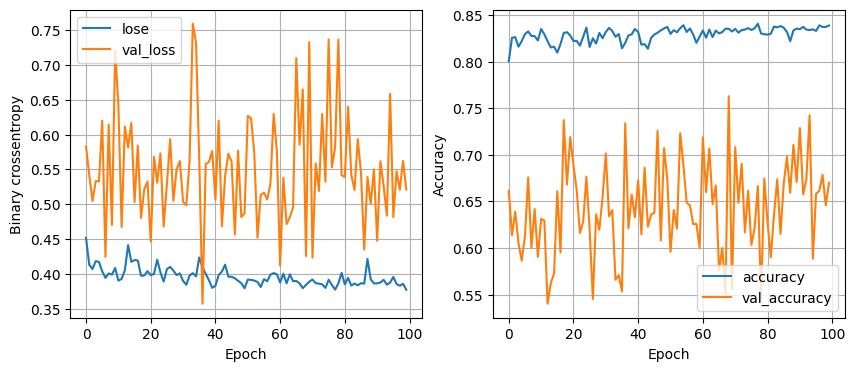

119/119 [==============================] - 0s 528us/step - loss: 0.3853 - accuracy: 0.8609


32 nodes, dropout 0.2, lr 0.005, batch size 32


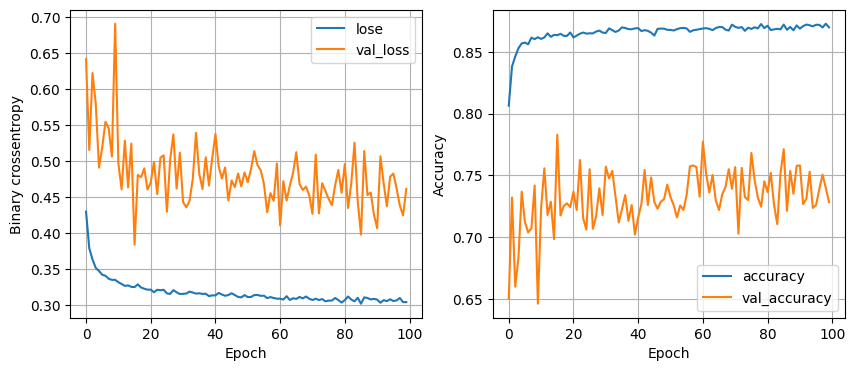

119/119 [==============================] - 0s 442us/step - loss: 0.3081 - accuracy: 0.8696
32 nodes, dropout 0.2, lr 0.005, batch size 64


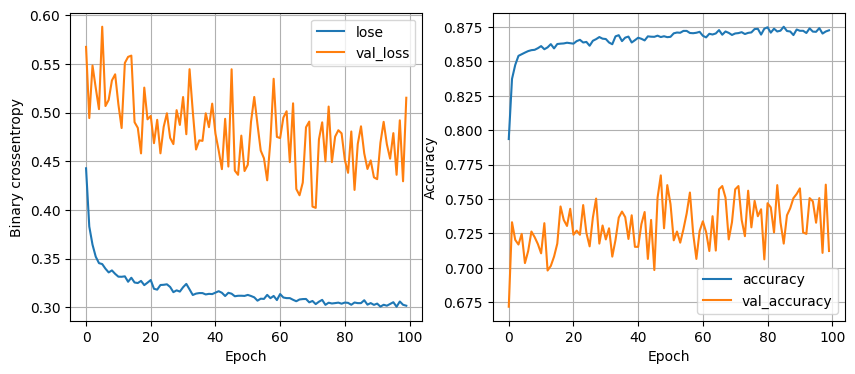

119/119 [==============================] - 0s 463us/step - loss: 0.3125 - accuracy: 0.8683


32 nodes, dropout 0.2, lr 0.005, batch size 128


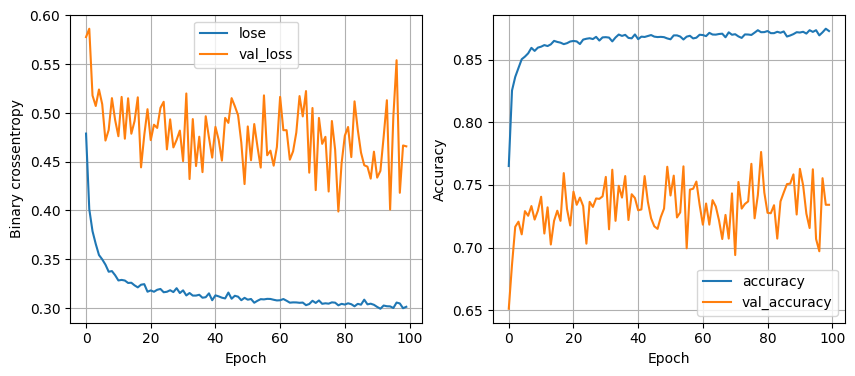

119/119 [==============================] - 0s 436us/step - loss: 0.3081 - accuracy: 0.8736


32 nodes, dropout 0.2, lr 0.001, batch size 32


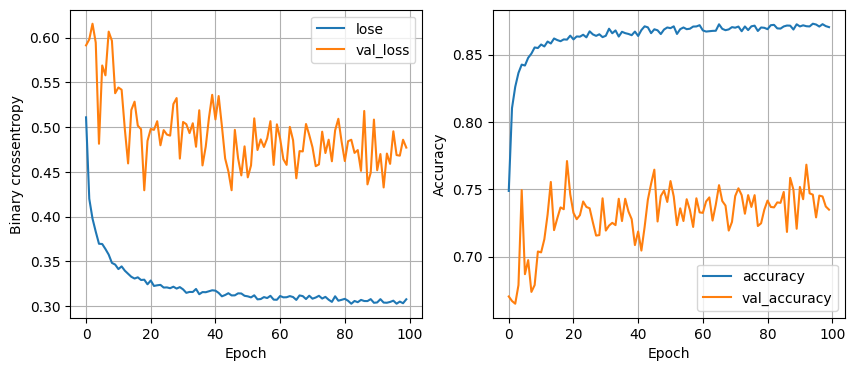

119/119 [==============================] - 0s 457us/step - loss: 0.3017 - accuracy: 0.8751


32 nodes, dropout 0.2, lr 0.001, batch size 64


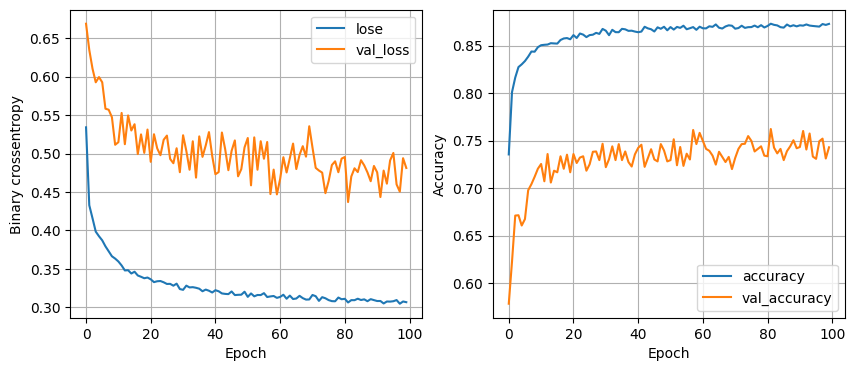

119/119 [==============================] - 0s 460us/step - loss: 0.3008 - accuracy: 0.8759


32 nodes, dropout 0.2, lr 0.001, batch size 128


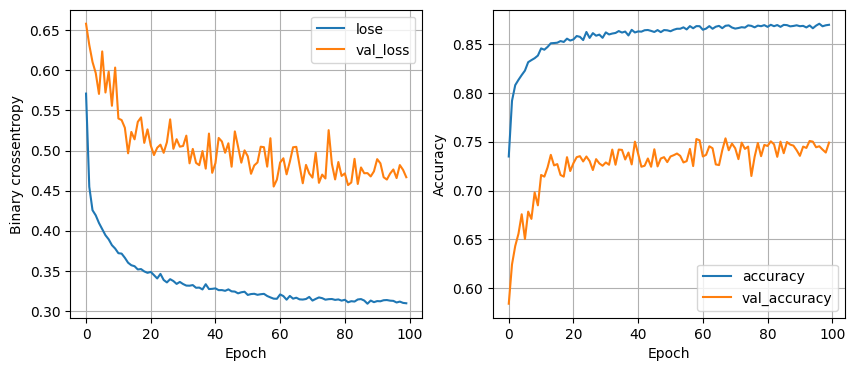

119/119 [==============================] - 0s 495us/step - loss: 0.3014 - accuracy: 0.8780


64 nodes, dropout 0, lr 0.1, batch size 32


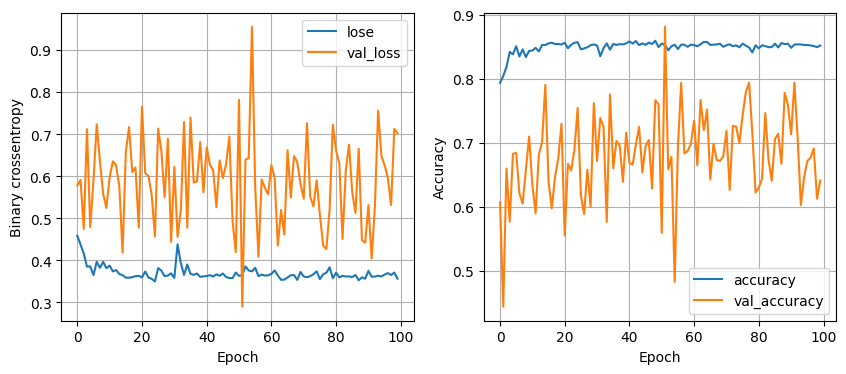

119/119 [==============================] - 0s 450us/step - loss: 0.3530 - accuracy: 0.8530


64 nodes, dropout 0, lr 0.1, batch size 64


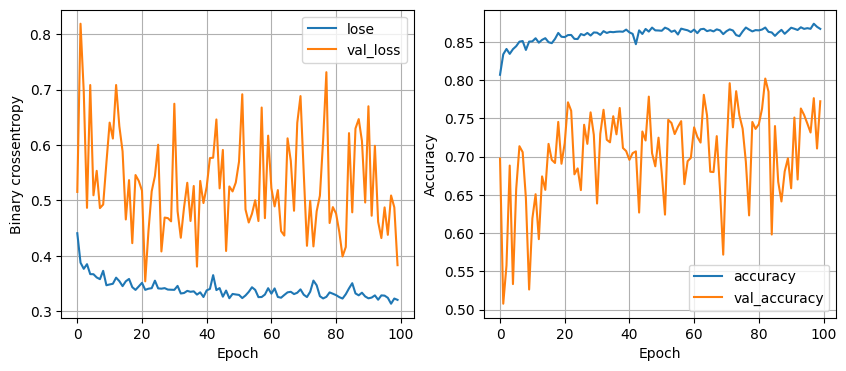

119/119 [==============================] - 0s 469us/step - loss: 0.3778 - accuracy: 0.8722


64 nodes, dropout 0, lr 0.1, batch size 128


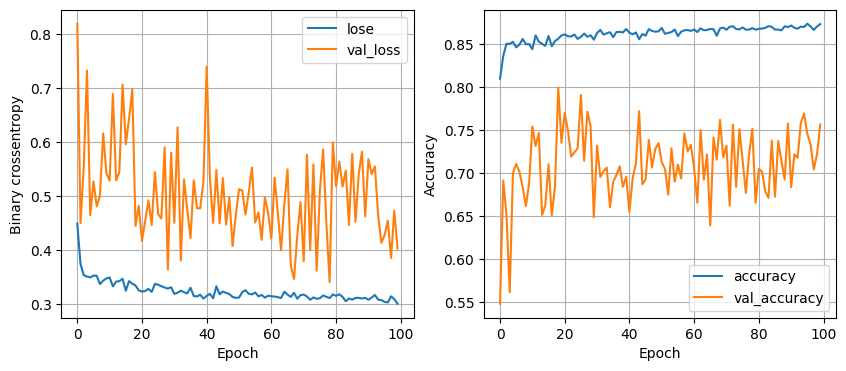

119/119 [==============================] - 0s 421us/step - loss: 0.3587 - accuracy: 0.8680


64 nodes, dropout 0, lr 0.005, batch size 32


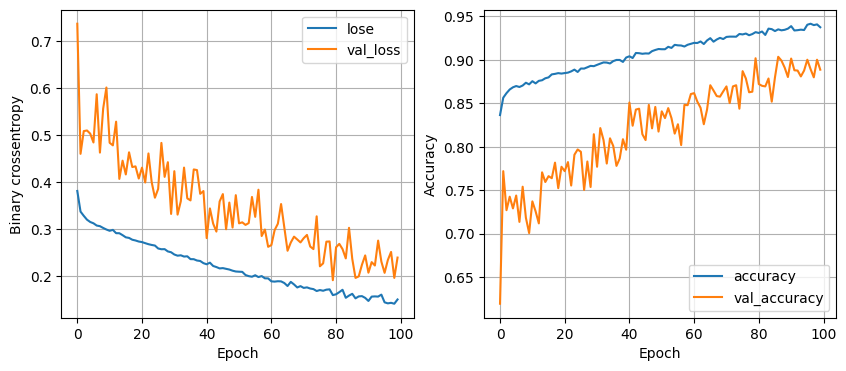

119/119 [==============================] - 0s 1ms/step - loss: 0.6020 - accuracy: 0.8575


64 nodes, dropout 0, lr 0.005, batch size 64


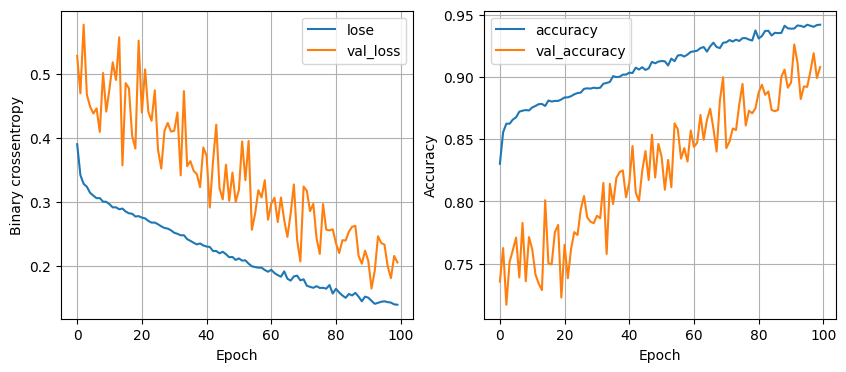

119/119 [==============================] - 0s 465us/step - loss: 0.6072 - accuracy: 0.8515


64 nodes, dropout 0, lr 0.005, batch size 128


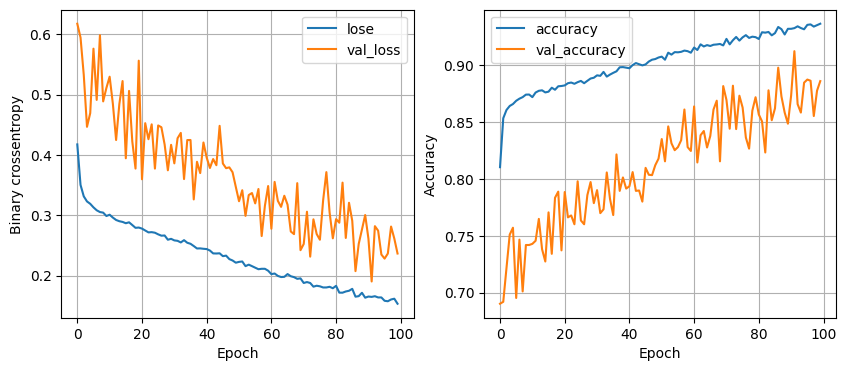

119/119 [==============================] - 0s 442us/step - loss: 0.4858 - accuracy: 0.8538


64 nodes, dropout 0, lr 0.001, batch size 32


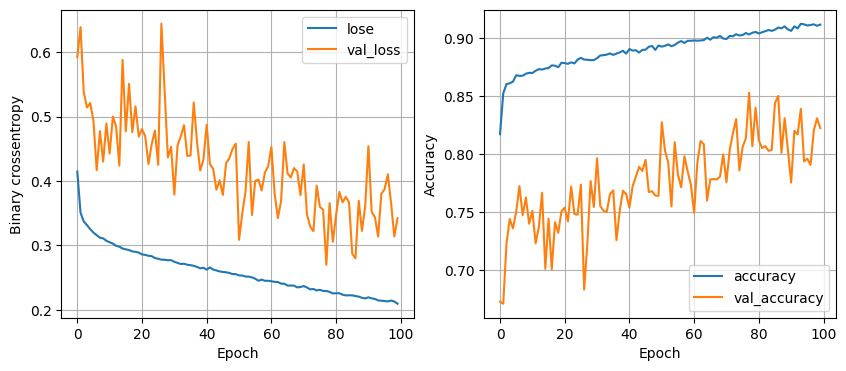

119/119 [==============================] - 0s 428us/step - loss: 0.3533 - accuracy: 0.8665


64 nodes, dropout 0, lr 0.001, batch size 64


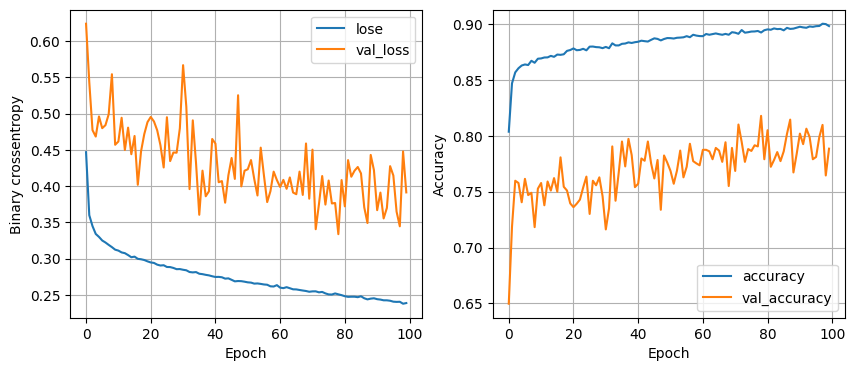

119/119 [==============================] - 0s 460us/step - loss: 0.3240 - accuracy: 0.8722


64 nodes, dropout 0, lr 0.001, batch size 128


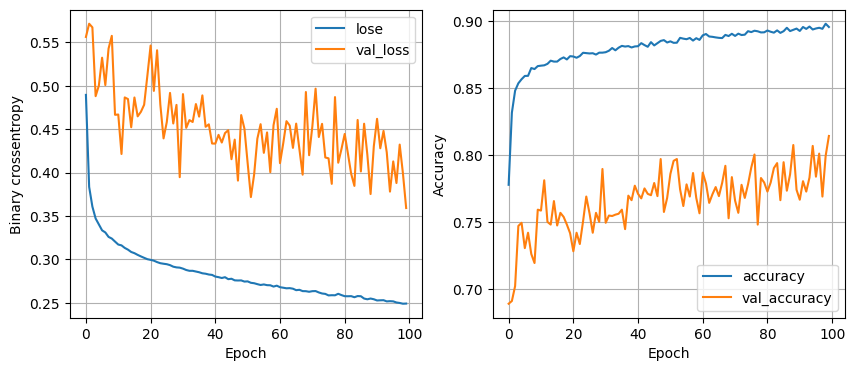

119/119 [==============================] - 0s 451us/step - loss: 0.3207 - accuracy: 0.8717


64 nodes, dropout 0.2, lr 0.1, batch size 32


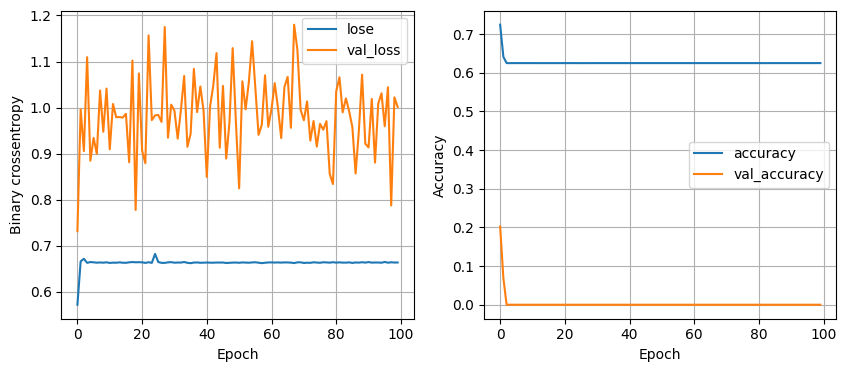

119/119 [==============================] - 0s 511us/step - loss: 0.6472 - accuracy: 0.6517


64 nodes, dropout 0.2, lr 0.1, batch size 64


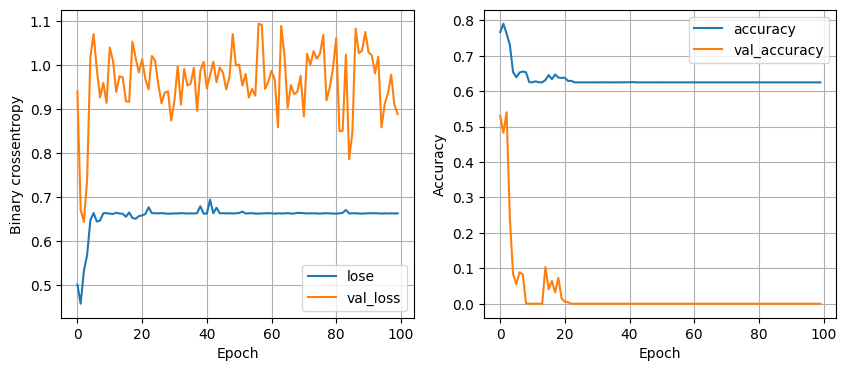

119/119 [==============================] - 0s 1ms/step - loss: 0.6547 - accuracy: 0.6517


64 nodes, dropout 0.2, lr 0.1, batch size 128


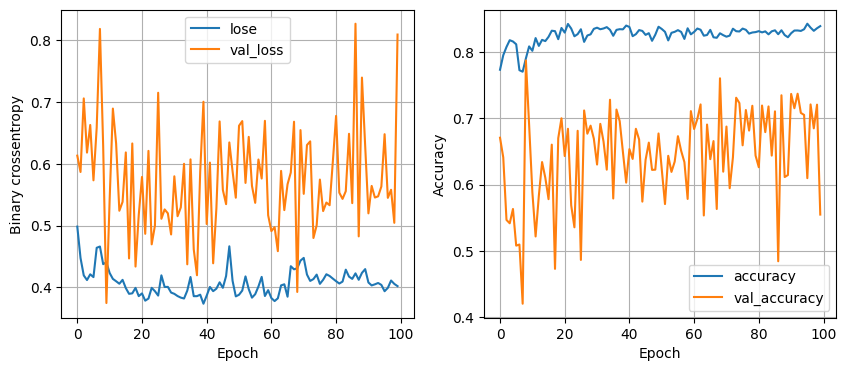

119/119 [==============================] - 0s 991us/step - loss: 0.3961 - accuracy: 0.8331


64 nodes, dropout 0.2, lr 0.005, batch size 32


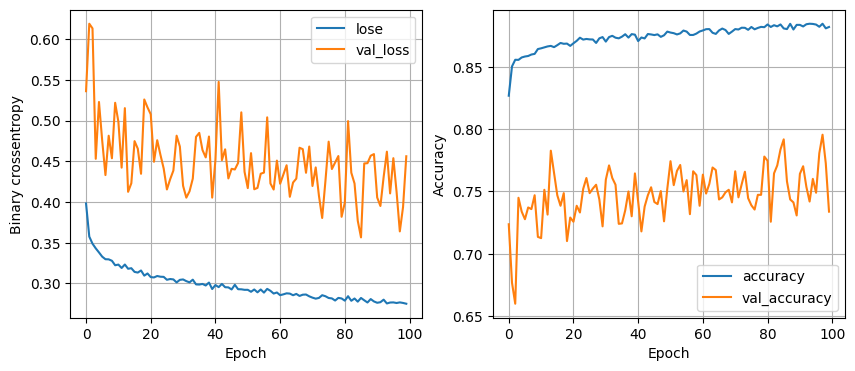

119/119 [==============================] - 0s 548us/step - loss: 0.3062 - accuracy: 0.8759


64 nodes, dropout 0.2, lr 0.005, batch size 64


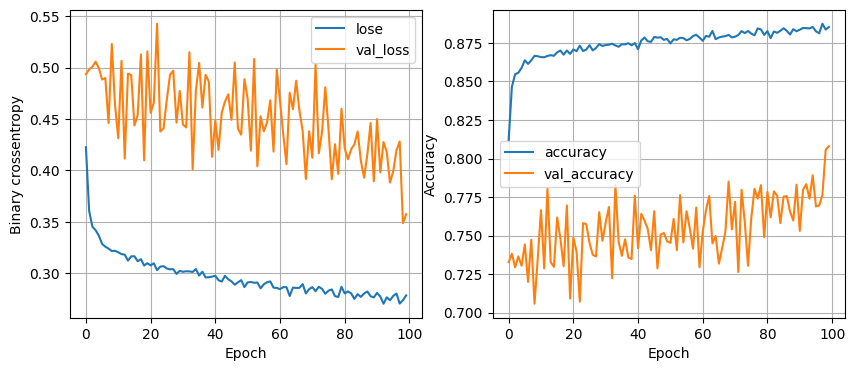

119/119 [==============================] - 0s 786us/step - loss: 0.3118 - accuracy: 0.8672


64 nodes, dropout 0.2, lr 0.005, batch size 128


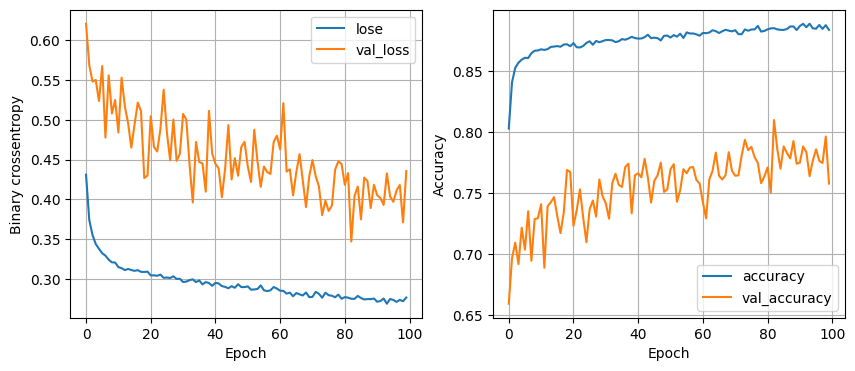

119/119 [==============================] - 0s 942us/step - loss: 0.3022 - accuracy: 0.8704


64 nodes, dropout 0.2, lr 0.001, batch size 32


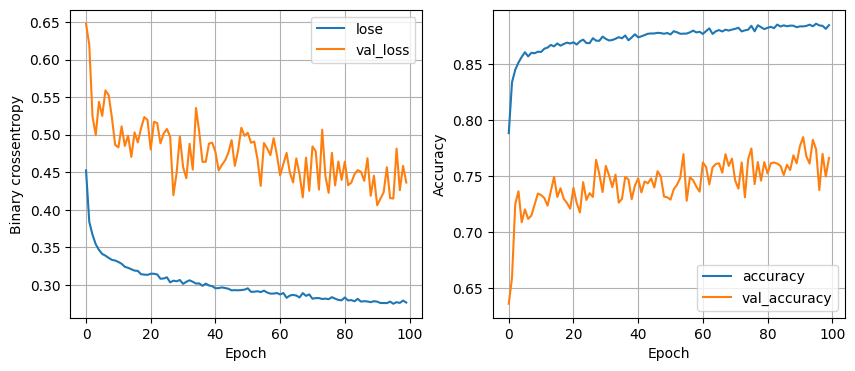

119/119 [==============================] - 0s 605us/step - loss: 0.3012 - accuracy: 0.8759


64 nodes, dropout 0.2, lr 0.001, batch size 64


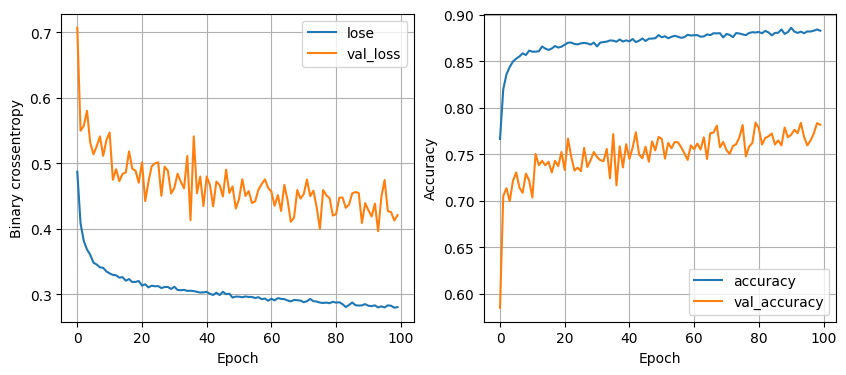

119/119 [==============================] - 0s 599us/step - loss: 0.2963 - accuracy: 0.8835


64 nodes, dropout 0.2, lr 0.001, batch size 128


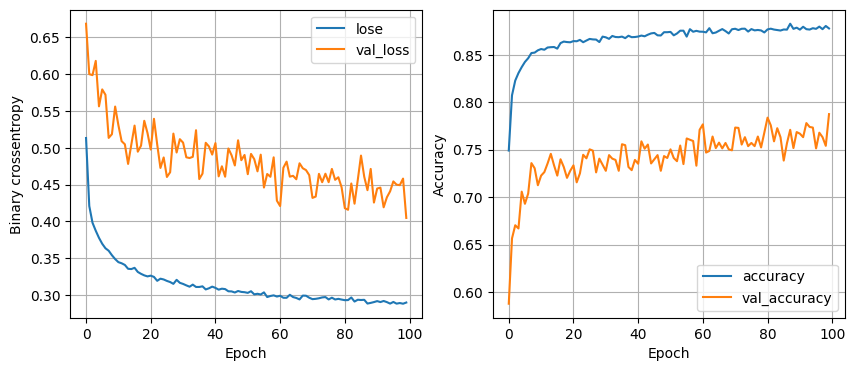

119/119 [==============================] - 0s 637us/step - loss: 0.3013 - accuracy: 0.8751


In [31]:
least_val_loss = float('inf')
least_val_model = None
epochs=100
for num_nodes in [16,32,64]:
  for dropout_prob in [0,0.2]:
    for lr in [0.1,0.005,0.001]:
      for batch_size in [32,64,128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
        model, history = train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(x_valid, y_valid)[0]
        # print(val_loss)
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model

In [32]:
y_pred = least_loss_model.predict(x_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)

119/119 [==============================] - 0s 342us/step


In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.74      0.81      1361
           1       0.87      0.95      0.91      2443

    accuracy                           0.88      3804
   macro avg       0.88      0.85      0.86      3804
weighted avg       0.88      0.88      0.87      3804

